In [ ]:
# 1. LOADING THE DATASET

In [1]:
#importing Libraraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initializing and Retriving the Data set...
data = pd.read_csv('/kaggle/input/marketing-insights-for-e-commerce-company/Online_Sales.csv')
data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


# 2. EXPLORING THE DATA SET
Exploring no. of Rows, Column, Datatype & Range etc... 

In [3]:
data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [4]:
# Retriving the overall BASIC information of the Dataset..
data.info()                               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [5]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [6]:
data.tail()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
52919,14410,48493,12/31/2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,12/31/2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,12/31/2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,12/31/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked
52923,14600,48497,12/31/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked


In [7]:
data.shape

(52924, 10)

In [8]:
data.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


# **3. DATA CLEANING AND PREPARATION** 
Handling Missing, incorrect and invalid data

In [9]:
data.isnull().sum()                # checking for the NULL values in columns

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

**From above description the data doesnot have any missing values**

**** REMOVING DUPLICATES****

In [10]:
# Checking for Duplicates in the dataset by few columns as subset
data.duplicated(subset=['CustomerID','Transaction_ID','Transaction_Date','Product_Category','Quantity']).sum()


13029

In [11]:
#Removing the duplicated values as per the subset mentioned
data.drop_duplicates(subset=['CustomerID','Transaction_ID','Transaction_Date','Product_Category','Quantity'],keep = 'first',inplace= True)

**Reducing the Memory Size of the dataset**

In [12]:
#Converting the datatype to category datatype
data['Product_SKU'] = data['Product_SKU'].astype('category')

In [13]:
#Checking the datatype is reflected as category in the original dataset for [Coupon_Status & Product_SKU]

data.info()

#Now, check all the Datatypes regarding column so that the invalid data's are avoided

<class 'pandas.core.frame.DataFrame'>
Index: 39895 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           39895 non-null  int64   
 1   Transaction_ID       39895 non-null  int64   
 2   Transaction_Date     39895 non-null  object  
 3   Product_SKU          39895 non-null  category
 4   Product_Description  39895 non-null  object  
 5   Product_Category     39895 non-null  object  
 6   Quantity             39895 non-null  int64   
 7   Avg_Price            39895 non-null  float64 
 8   Delivery_Charges     39895 non-null  float64 
 9   Coupon_Status        39895 non-null  object  
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 3.2+ MB


In [14]:
#Creating new Column and assigning values to the dataset

Websites =['Amazon','Meesho','Ajio','Myntra','Alibaba','Flipkart','Urbanic']
data['Purchased_Website'] = data.apply(lambda row: np.random.choice(Websites),axis =1)

# ****4. Exploratory Analysis and visualization Matplotlib****

**1.What are the top 5 sold product category?**

/tmp/ipykernel_33/711794304.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,top_categories[i]+space,str(top_categories[i]), ha="center",va="bottom")


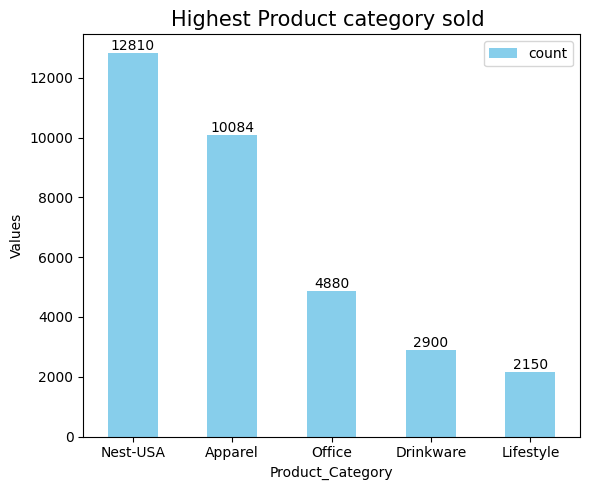

In [15]:
category_counts = data['Product_Category'].value_counts()                     #Finding the total values of product categories sold
top_categories = category_counts.head(5)                                       # printing the top 5 categories 

#lets,give the bar-graph figure size 
plt.figure(figsize=(6,5))
bar_width =0.5
#plotting the columns in bargraph/chart
top_categories.plot(kind='bar',color='skyblue', width=bar_width)

# Labelling the plot
plt.title('Highest Product category sold ',fontsize=15)
plt.ylabel('Values', fontsize=10)
plt.xlabel('Product_Category',fontsize=10)

# Retriving the total counts on bargraph- bars for easy understanding
count=0
space=0.5
for i in range(len(top_categories)):
    plt.text(i,top_categories[i]+space,str(top_categories[i]), ha="center",va="bottom")

plt.xticks(rotation= 360)      # xticks text declaration
plt.legend()                   # Shows the count label with colour int the graph
plt.tight_layout()             #Ensure tight layout to prevent clipping of labels

# Saving the bar-plot
plt.savefig('highest_product_categories.png')
plt.show()


In [16]:
data.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Purchased_Website
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Myntra
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Amazon
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Ajio


**2. What is the impact of coupons? (show in percentages(%))**

In [17]:
coupon = data['Coupon_Status'].value_counts()
coupon


Coupon_Status
Clicked     20369
Used        13448
Not Used     6078
Name: count, dtype: int64

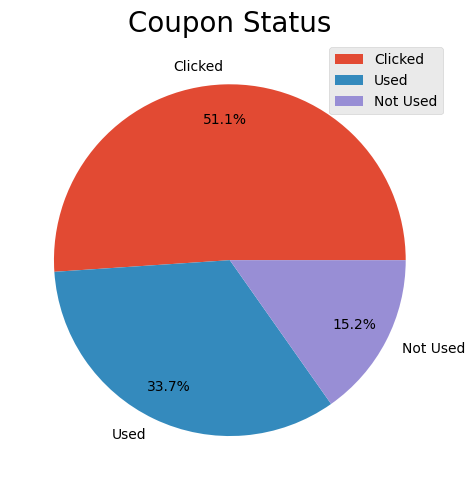

In [18]:
# Retrieving the counts of coupon status
coupon = data['Coupon_Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))  # Adjusting the figure size
plt.style.use('ggplot')

# Plotting the pie chart with percentages and labels
plt.pie(coupon, labels=coupon.index, autopct='%1.1f%%', pctdistance=0.8)

# Adding a title with custom font and size
plt.title('Coupon Status', fontdict={'fontname': 'Arial', 'fontsize': 20})

# Setting font size for the labels
plt.setp(plt.gca().get_xticklabels(), fontsize=18)

# Ensure tight layout to prevent clipping of labels
plt.tight_layout()

# Adding a legend with custom location
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0, 0.5, 1))

# Saving the ba-plot
plt.savefig('coupon_status.png')

# Displaying the plot
plt.show()

**3. What are total sales/transactions per month(show max and min )?**

In [19]:
data['Transaction_Date'].value_counts()

Transaction_Date
11/27/2019    279
12/18/2019    219
8/16/2019     208
7/13/2019     203
8/2/2019      201
             ... 
2/5/2019       34
9/10/2019      33
12/24/2019     26
7/1/2019       24
8/20/2019      23
Name: count, Length: 365, dtype: int64

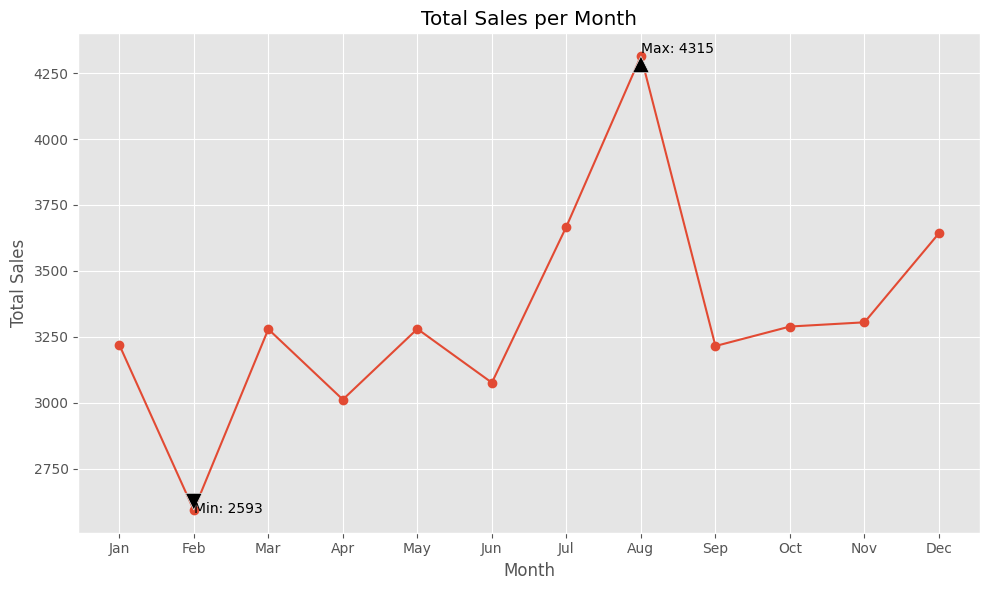

In [20]:
# Convert 'Transaction_Date' to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Extract year and month
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month

# Group sales data by month and year, then calculate total sales for each month
monthly_sales = data.groupby(['Year', 'Month']).size()
total_sales_per_month = monthly_sales.groupby('Month').sum()

# Plot total sales per month using a line graph
plt.figure(figsize=(10, 6))
plt.plot(total_sales_per_month.index, total_sales_per_month.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis ticks to month names
plt.grid(True)  # Add grid lines for better readability

# Retrieve and annotate the maximum value on the graph
max_value = total_sales_per_month.max()
max_month = total_sales_per_month.idxmax()
plt.annotate(f'Max: {max_value}', xy=(max_month, max_value), xytext=(max_month, max_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),)

# Retrieve and annotate the minimum value on the graph
min_value = total_sales_per_month.min()
min_month = total_sales_per_month.idxmin()
plt.annotate(f'Min: {min_value}', xy=(min_month, min_value), xytext=(min_month, min_value - 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Saving the line-plot
plt.savefig('transactions.png')

plt.tight_layout()
plt.show()

**4. how many unique customers made a transactions per month?**

In [21]:
data['CustomerID'].nunique()

1468

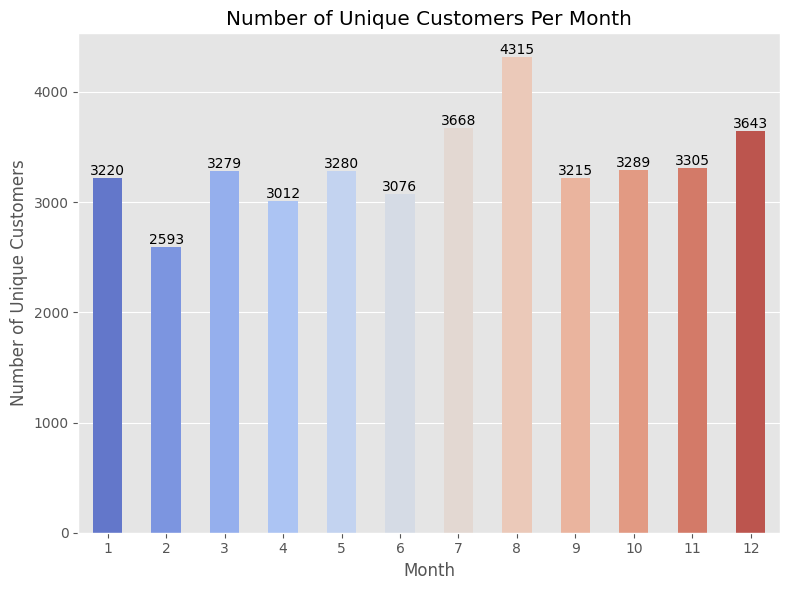

In [22]:
# Convert 'Transaction_Date' to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Convert 'Transaction_Date' to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Extract month from 'Transaction_Date'
data['Month'] = data['Transaction_Date'].dt.month

# Calculate the number of unique customers per month
unique_customers_per_month = data.groupby('Month')['CustomerID'].nunique().reset_index()


# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
bar_width=0.5
ax = sns.countplot(x='Month', data=data, palette='coolwarm',width=bar_width)
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Unique Customers Per Month')

# Add numbers above the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), str(int(i.get_height())), ha='center', va='bottom')
# Saving the count-plot
plt.savefig('unique_customers.png')

plt.tight_layout()
plt.show()

**5. What is the total revenue and total transaction on each month?**

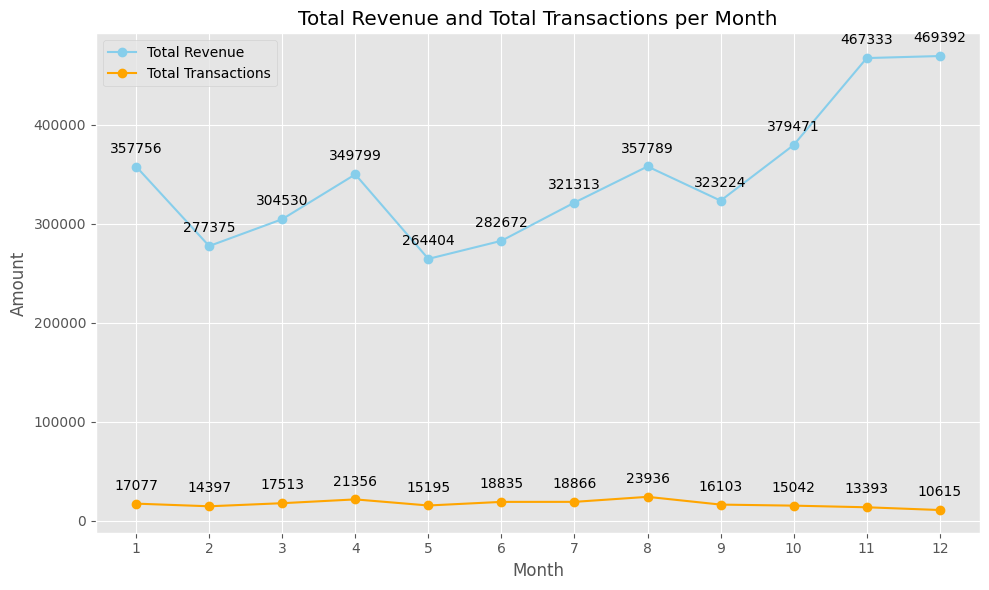

In [23]:
# Convert 'Transaction_Date' to datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Calculate total revenue for each transaction
data['Total_Revenue'] = data['Quantity'] * data['Avg_Price']

# Extract month from 'Transaction_Date'
data['Month'] = data['Transaction_Date'].dt.month

# Group data by month and calculate total revenue and total transactions for each month
monthly_summary = data.groupby('Month').agg({'Total_Revenue': 'sum', 'Quantity': 'sum'}).reset_index()

# Plot total revenue and total transactions
plt.figure(figsize=(10, 6))

# Plot total revenue
plt.plot(monthly_summary['Month'], monthly_summary['Total_Revenue'], color='skyblue', marker='o', label='Total Revenue')

# Plot total transactions
plt.plot(monthly_summary['Month'], monthly_summary['Quantity'], color='orange', marker='o', label='Total Transactions')

# Annotate each dot with its corresponding count
for x, y in zip(monthly_summary['Month'], monthly_summary['Total_Revenue']):
    plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(monthly_summary['Month'], monthly_summary['Quantity']):
    plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Total Revenue and Total Transactions per Month')
plt.xticks(range(1, 13))  # Assuming the month numbers are from 1 to 12
plt.legend()
plt.grid(True)
plt.tight_layout()

# Saving the lines-plot
plt.savefig('total_revenue_&_transactions.png')

plt.show()

# 5. CONCLUSION
**A comprehensive analysis of these data columns can offer valuable insights into customer behavior, product performance, sales trends, and the effectiveness of marketing strategies, enabling businesses to make data-driven decisions to optimize their operations and maximize revenue.**
****